In [1]:
#import statements, weight definitions, data classes, rounding function
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import warnings
warnings.filterwarnings('ignore') 

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from numpy import random
import matplotlib.pyplot as plt




#Data class
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

    
    
    
    
#Data loaders (to look at data) and deal with data (training and testing)
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    
    
    

def binary_acc(y_pred, y_test): 
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc




X=random.rand(10000, 5)

np.random.normal(0, 1, size=(10000, 10))


y=[]
for i in range(10000):
    y.append(random.binomial(1, 0.5, size=None))




In [2]:
#model class 5 layers, then an output layer
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        self.layer_1 = nn.Linear(5, 5) 
        self.layer_2 = nn.Linear(5, 5) 
        self.layer_3 = nn.Linear(5, 5)
        self.layer_4 = nn.Linear(5,5)
        self.layer_5 = nn.Linear(5, 5) 
        self.layer_out = nn.Linear(5, 1) #output layer
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        
        self.batchnorm1 = nn.BatchNorm1d(5)
        self.batchnorm2 = nn.BatchNorm1d(5)
        self.batchnorm3 = nn.BatchNorm1d(5)
        self.batchnorm4 = nn.BatchNorm1d(5)
        self.batchnorm5 = nn.BatchNorm1d(5)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        x = self.relu(self.layer_5(x))
        x = self.batchnorm5(x)        
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [3]:
#parallel model (two 5 layer models, with output going into new output layer)
class parallelmodel(nn.Module):
    def __init__(self, originalmodel):
        super(parallelmodel, self).__init__()
        self.layer1_1 = copy.deepcopy(originalmodel.layer_1)
        self.layer1_2 = copy.deepcopy(originalmodel.layer_2)
        self.layer1_3 = copy.deepcopy(originalmodel.layer_3)
        self.layer1_4 = copy.deepcopy(originalmodel.layer_4)
        self.layer1_5 = copy.deepcopy(originalmodel.layer_5)
        self.layer1_out = copy.deepcopy(originalmodel.layer_out)
        
        self.relu1 = copy.deepcopy(originalmodel.relu)        
        self.dropout1 = copy.deepcopy(originalmodel.dropout)
        
        self.batchnorm1_1 = copy.deepcopy(originalmodel.batchnorm1)
        self.batchnorm1_2 = copy.deepcopy(originalmodel.batchnorm2)
        self.batchnorm1_3 = copy.deepcopy(originalmodel.batchnorm3)
        self.batchnorm1_4 = copy.deepcopy(originalmodel.batchnorm4)
        self.batchnorm1_5 = copy.deepcopy(originalmodel.batchnorm5)
        #self.batchnorm1_out=nn.BatchNorm1d(1)

        
        self.batchnorm2_1 = nn.BatchNorm1d(5)
        self.batchnorm2_2 = nn.BatchNorm1d(5)
        self.batchnorm2_3 = nn.BatchNorm1d(5)
        self.batchnorm2_4 = nn.BatchNorm1d(5)
        self.batchnorm2_5 = nn.BatchNorm1d(5)
        #self.batchnorm2_out=nn.BatchNorm1d()
        
        self.layer2_1 = nn.Linear(5, 5) 
        self.layer2_2 = nn.Linear(5, 5) 
        self.layer2_3 = nn.Linear(5,5)
        self.layer2_4 = nn.Linear(5, 5)
        self.layer2_5 = nn.Linear(5, 5) 
        self.layer2_out = nn.Linear(5, 1) 
        
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.1)
        
        #changed bias
        self.outputlayer= nn.Linear(2, 1, bias=False )
        self.alpha=[]
        self.beta=[]
        
        
        
        
        
    def forward(self, inputs):
        x = self.relu1(self.layer1_1(inputs))
        x = self.batchnorm1_1(x)
        x = self.relu1(self.layer1_2(x))
        x = self.batchnorm1_2(x)
        x = self.relu1(self.layer1_3(x))
        x = self.batchnorm1_3(x)
        x = self.relu1(self.layer1_4(x))
        x = self.batchnorm1_4(x)
        x = self.relu1(self.layer1_5(x))
        x = self.batchnorm1_5(x) 
        x = self.dropout1(x)
        x = self.layer1_out(x)
        
        
        
        
        
        
        
        x=torch.sigmoid(x)
        
        
        y = self.relu2(self.layer2_1(inputs))
        y = self.batchnorm2_1(y)
        y = self.relu2(self.layer2_2(y))
        y = self.batchnorm2_2(y)
        y = self.relu2(self.layer2_3(y))
        y = self.batchnorm2_3(y)
        y = self.relu2(self.layer2_4(y))
        y = self.batchnorm2_4(y)
        y = self.relu2(self.layer2_5(y))
        y = self.batchnorm2_5(y)        
        y = self.dropout2(y)
        y = self.layer2_out(y)
        y=torch.sigmoid(y)
        
        z=self.outputlayer(torch.cat([x, y], dim=1))
        return z
        
        
        

In [4]:
#parrallel submodels
class parrallel_submodel(nn.Module):
    def __init__(self):
        super(parrallel_submodel, self).__init__()
        self.layer_1 = nn.Linear(5, 5) 
        self.layer_2 = nn.Linear(5, 5) 
        self.layer_3 = nn.Linear(5, 5)
        self.layer_4 = nn.Linear(5,5)
        self.layer_5 = nn.Linear(5, 5) 
        self.layer_out = nn.Linear(5, 1) #output layer
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        
        self.batchnorm1 = nn.BatchNorm1d(5)
        self.batchnorm2 = nn.BatchNorm1d(5)
        self.batchnorm3 = nn.BatchNorm1d(5)
        self.batchnorm4 = nn.BatchNorm1d(5)
        self.batchnorm5 = nn.BatchNorm1d(5)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        x = self.relu(self.layer_5(x))
        x = self.batchnorm5(x)        
        x = self.dropout(x)
        x = self.layer_out(x)
        x = torch.sigmoid(x)
        
        return x

In [5]:
#parallel model V2

class parallelmodel1(nn.Module):
    def __init__(self, originalmodel):
        super(parallelmodel1, self).__init__()

        self.pretrainednetwork=parrallel_submodel()
        
        
        
        
        self.pretrainednetwork.layer_1 = copy.deepcopy(originalmodel.layer_1)
        self.pretrainednetwork.layer_2 = copy.deepcopy(originalmodel.layer_2)
        self.pretrainednetwork.layer_3 = copy.deepcopy(originalmodel.layer_3)
        self.pretrainednetwork.layer_4 = copy.deepcopy(originalmodel.layer_4)
        self.pretrainednetwork.layer_5 = copy.deepcopy(originalmodel.layer_5)
        self.pretrainednetwork.layer_out = copy.deepcopy(originalmodel.layer_out)
        
        self.pretrainednetwork.relu = copy.deepcopy(originalmodel.relu)        
        self.pretrainednetwork.dropout = copy.deepcopy(originalmodel.dropout)
        
        self.pretrainednetwork.batchnorm_1 = copy.deepcopy(originalmodel.batchnorm1)
        self.pretrainednetwork.batchnorm_2 = copy.deepcopy(originalmodel.batchnorm2)
        self.pretrainednetwork.batchnorm_3 = copy.deepcopy(originalmodel.batchnorm3)
        self.pretrainednetwork.batchnorm_4 = copy.deepcopy(originalmodel.batchnorm4)
        self.pretrainednetwork.batchnorm_5 = copy.deepcopy(originalmodel.batchnorm5)

        
        self.untrainednetwork=parrallel_submodel()
        
        
        self.outputlayer= nn.Linear(2, 1, bias=False )
        
    def forward(self, inputs):
        x=self.pretrainednetwork(inputs)
        y=self.untrainednetwork(inputs)
        z=self.outputlayer(torch.cat([x, y], dim=1))
        return z

In [6]:
#groundtruth model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
scaler = StandardScaler()
X_allscaled = scaler.fit_transform(X) #scales data
X_formatted = testData(torch.FloatTensor(X_allscaled))
EPOCHS = 100 #number of passes of whole data
BATCH_SIZE = 64 #size of data going through at once
LEARNING_RATE = 0.01




Truthtrain=trainData(torch.FloatTensor(X_allscaled), 
                       torch.FloatTensor(y))


Truthloadertrain= DataLoader(dataset=Truthtrain, batch_size=BATCH_SIZE, shuffle=True)
GroundTruth = binaryClassification()


GroundTruth.to(device)
criterion = nn.BCEWithLogitsLoss()
truthoptimizer = optim.Adam(GroundTruth.parameters(), lr=LEARNING_RATE)

#print(list(model.parameters())[0])



baddata=True
while(baddata):

    

    GroundTruth.train()
    for e in range(1, EPOCHS+1):
        epoch_loss = 0
        epoch_acc = 0
        for X_batch, y_batch in Truthloadertrain:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            truthoptimizer.zero_grad()

            y_pred = GroundTruth(X_batch)

            loss = criterion(y_pred, y_batch.unsqueeze(1))
            acc = binary_acc(y_pred, y_batch.unsqueeze(1))

            loss.backward()
            truthoptimizer.step()

            epoch_loss += loss.item()
            epoch_acc += acc.item()





    Truthtest = testData(torch.FloatTensor(X_allscaled))
    Truthloader = DataLoader(dataset=Truthtest, batch_size=1)



    truth_list = []
    GroundTruth.eval()
    with torch.no_grad():
        for X_batch in Truthloader:
            X_batch = X_batch.to(device)
            y_truth = GroundTruth(X_batch)
            y_truth = torch.sigmoid(y_truth)
            y_truthtag = torch.round(y_truth)
            truth_list.append(y_truthtag.cpu().numpy())

    y = [a.squeeze().tolist() for a in truth_list] #new truth values
    #split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)
    #print(y_train)
    #rescale data 
    scaler = StandardScaler()
    truthcounter=0
    for i in y:
        if i==1:
            truthcounter=truthcounter+1
    
    
    #print(truthcounter)
    if truthcounter/len(y)<.8 and truthcounter/len(y)>.2:
        baddata=False

    




train_data= trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))



test_data = testData(torch.FloatTensor(X_test))

#data loader initiation
train_loader= DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)                      
test_loader = DataLoader(dataset=test_data, batch_size=1)




device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



In [7]:
#train first model
trained = binaryClassification()
trained.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(trained.parameters(), lr=LEARNING_RATE)

#w1=(trained.layer_1.weight)
#w2=(trained.layer_2.weight)
#w3=(trained.layer_3.weight)
#w4=(trained.layer_4.weight)
#w5=(trained.layer_5.weight)
#print(w1)
#print(w2)
#print(w3)
#print(w4)
#print(w5)
#print(trained.layer_out.weight)
#train trained model
trained.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = trained(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    #print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')


    
    
y_fullmodelpred_list =[]
trained.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = trained(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_fullmodelpred_list.append(y_pred_tag.cpu().numpy())


y_fullmodelpred_list = [a.squeeze().tolist() for a in y_fullmodelpred_list]



    
fullmodelcounter=0
for i in range(len(y_fullmodelpred_list)):
    if y_fullmodelpred_list[i]==y_test[i]:
        fullmodelcounter=fullmodelcounter+1       

print("# correct: ",fullmodelcounter, " out of ", len(y_test))
        
print("Full model statistics")
print(classification_report(y_test, y_fullmodelpred_list))    
    
    
        
    

# correct:  2948  out of  3300
Full model statistics
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1502
         1.0       0.90      0.91      0.90      1798

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300



In [8]:
#train parralel model
parralel = parallelmodel(trained)
parralel.to(device)
criterion = nn.BCEWithLogitsLoss()

parralel.outputlayer.weight=torch.nn.Parameter(data=torch.tensor([[.9,0.05]]), requires_grad=True)
parralel.alpha.append(.9)
parralel.beta.append(.05)
epochlist=[]
losslist=[]

paroptimizer = optim.Adam(parralel.parameters(), lr=LEARNING_RATE)



#EPOCHS = 300 #number of passes of whole data
#BATCH_SIZE = 16 #size of data going through at once



#train trained model
parralel.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        paroptimizer.zero_grad()
        
        y_pred = parralel(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))

        loss.backward()
        paroptimizer.step()
        
        parralel.alpha.append(parralel.outputlayer.weight[0][0].detach().numpy().item())
        parralel.beta.append(parralel.outputlayer.weight[0][1].detach().numpy().item())
        
        epoch_loss += loss.item()

        epoch_acc += acc.item()
        
        

        
    epochlist.append(e)   
    losslist.append(epoch_loss/len(train_loader))
    #print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

    
passlist=list(range(0,len(parralel.alpha)))
    
#losslist.insert(0, losslist[0])

  
print(len(parralel.alpha))
    
y_parmodelpred_list =[]
parralel.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = parralel(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_parmodelpred_list.append(y_pred_tag.cpu().numpy())


y_parmodelpred_list = [a.squeeze().tolist() for a in y_parmodelpred_list]


#print(y_parmodelpred_list)
    
parmodelcounter=0
for i in range(len(y_fullmodelpred_list)):
    if y_parmodelpred_list[i]==y_test[i]:
        parmodelcounter=parmodelcounter+1       

print("# correct: ",parmodelcounter, " out of ", len(y_test))
        
print("Full model statistics")
print(classification_report(y_test, y_parmodelpred_list))    
    
    
print("output weight: ", parralel.outputlayer.weight)

1101
# correct:  275  out of  330
Full model statistics
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       193
         1.0       0.80      0.80      0.80       137

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

output weight:  Parameter containing:
tensor([[ 3.0469, -3.9808]], requires_grad=True)


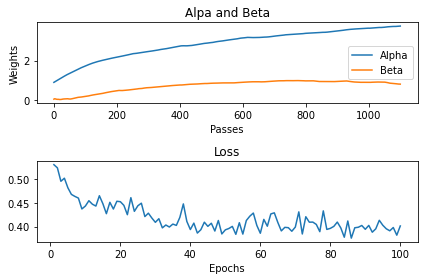

In [9]:
#graphs

fig, (weights, lossgraph) = plt.subplots(2)
weights.plot(passlist,parralel.alpha, label="Alpha")
weights.plot(passlist,parralel.beta, label="Beta")
weights.legend()

weights.set_xlabel('Passes')
weights.set_ylabel('Weights')
weights.set_title('Alpa and Beta')




plt.plot(epochlist,losslist, label="loss")

lossgraph.set_xlabel('Epochs')
lossgraph.set_label('Loss')
lossgraph.set_title('Loss')


fig.tight_layout()
#plt.savefig('e2fullparalelgraph3')



In [8]:
#half model stats

halfmodeltrained=binaryClassification()
halfmodellow=binaryClassification()

halfmodeltrained.layer_1 = copy.deepcopy(parralel.layer1_1)
halfmodeltrained.layer_2 = copy.deepcopy(parralel.layer1_2)
halfmodeltrained.layer_3 = copy.deepcopy(parralel.layer1_3)
halfmodeltrained.layer_4 = copy.deepcopy(parralel.layer1_4)
halfmodeltrained.layer_5 = copy.deepcopy(parralel.layer1_5)
halfmodeltrained.layer_out = copy.deepcopy(parralel.layer1_out)


halfmodellow.layer_1 = copy.deepcopy(parralel.layer2_1)
halfmodellow.layer_2 = copy.deepcopy(parralel.layer2_2)
halfmodellow.layer_3 = copy.deepcopy(parralel.layer2_3)
halfmodellow.layer_4 = copy.deepcopy(parralel.layer2_4)
halfmodellow.layer_5 = copy.deepcopy(parralel.layer2_5)
halfmodellow.layer_out = copy.deepcopy(parralel.layer2_out)


print("pretrained stats:")



y_pretrianedlist =[]
y_pretrainedunrounded=[]
halfmodeltrained.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = halfmodeltrained(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pretrainedunrounded.append(y_test_pred.cpu().numpy())
        y_pred_tag = torch.round(y_test_pred)
        y_pretrianedlist.append(y_pred_tag.cpu().numpy())


y_pretrianedlist = [a.squeeze().tolist() for a in y_pretrianedlist]
y_pretrainedunrounded = [a.squeeze().tolist() for a in y_pretrainedunrounded]



correctcounter=0
for i in range(len(y_pretrianedlist)):
    if y_pretrianedlist[i]==y_test[i]:
        correctcounter=correctcounter+1 
        
        
print("Tained half model;")
print("Number correct full model: ", correctcounter, " out of ", len(y_test))
print("precision=(# of correct)/(# of guessed)")
print("recall=(# of correct)/(total)")
print(classification_report(y_test, y_pretrianedlist))





print("untrained half stats:")
y_untrianedlist =[]
y_untrained_unrounded=[]
halfmodellow.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = halfmodellow(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_untrained_unrounded.append(y_test_pred.cpu().numpy())
        y_pred_tag = torch.round(y_test_pred)
        y_untrianedlist.append(y_pred_tag.cpu().numpy())


y_untrianedlist = [a.squeeze().tolist() for a in y_untrianedlist]
y_untrained_unrounded = [a.squeeze().tolist() for a in y_untrained_unrounded]



correctcounter=0
for i in range(len(y_untrianedlist)):
    if y_untrianedlist[i]==y_test[i]:
        correctcounter=correctcounter+1 
        
        
print("untained half model;")
print("Number correct full model: ", correctcounter, " out of ", len(y_test))
print("precision=(# of correct)/(# of guessed)")
print("recall=(# of correct)/(total)")
print(classification_report(y_test, y_untrianedlist))






pretrained stats:
Tained half model;
Number correct full model:  2035  out of  3300
precision=(# of correct)/(# of guessed)
recall=(# of correct)/(total)
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76      2019
         1.0       0.83      0.02      0.03      1281

    accuracy                           0.62      3300
   macro avg       0.72      0.51      0.40      3300
weighted avg       0.70      0.62      0.48      3300

untrained half stats:
untained half model;
Number correct full model:  1300  out of  3300
precision=(# of correct)/(# of guessed)
recall=(# of correct)/(total)
              precision    recall  f1-score   support

         0.0       0.73      0.01      0.03      2019
         1.0       0.39      0.99      0.56      1281

    accuracy                           0.39      3300
   macro avg       0.56      0.50      0.29      3300
weighted avg       0.60      0.39      0.23      3300



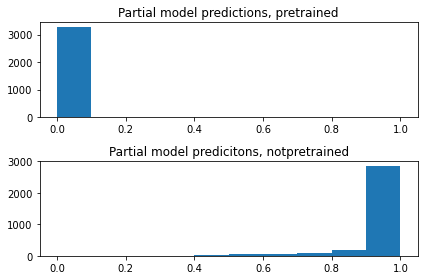

In [9]:
#histograms
xbins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
fig=plt.figure()
trained_histo=fig.add_subplot(2,1,1)
untrained_histo=fig.add_subplot(2,1,2)
n, bins, patches = trained_histo.hist(y_pretrainedunrounded,xbins)
n, bins, patches = untrained_histo.hist(y_untrained_unrounded,xbins)
untrained_histo.set_title('Partial model predicitons, notpretrained')
trained_histo.set_title("Partial model predictions, pretrained")
fig.tight_layout()

#plt.hist(y_pretrainedunrounded, bins
#plt.hist(y_untrained_unrounded, bins=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9])


plt.savefig('HIST_TRe2_N64_D10000_FULL_NOBIAS')


In [ ]:
#multiple routines
val = input("Enter number of training routines:")
for k in range(int(val)):




    X=random.rand(1000, 5)

    np.random.normal(0, 1, size=(1000, 10))


    y=[]
    for i in range(1000):
        y.append(random.binomial(1, 0.5, size=None))

    
    truth_list = []
    GroundTruth.eval()
    with torch.no_grad():
        for X_batch in Truthloader:
            X_batch = X_batch.to(device)
            y_truth = GroundTruth(X_batch)
            y_truth = torch.sigmoid(y_truth)
            y_truthtag = torch.round(y_truth)
            truth_list.append(y_truthtag.cpu().numpy())

    y = [a.squeeze().tolist() for a in truth_list] #new truth values
    #split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)






    train_data= trainData(torch.FloatTensor(X_train), 
                           torch.FloatTensor(y_train))



    test_data = testData(torch.FloatTensor(X_test))

    #data loader initiation
    train_loader= DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)                      
    test_loader = DataLoader(dataset=test_data, batch_size=1)





    #train trained model
    parralel.train()
    for e in range(1, EPOCHS+1):
        epoch_loss = 0
        epoch_acc = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            paroptimizer.zero_grad()

            y_pred = parralel(X_batch)

            loss = criterion(y_pred, y_batch.unsqueeze(1))
            acc = binary_acc(y_pred, y_batch.unsqueeze(1))

            loss.backward()
            paroptimizer.step()

            epoch_loss += loss.item()
            epoch_acc += acc.item()


        #print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')




    y_parmodelpred_list =[]
    parralel.eval()
    with torch.no_grad():
        for X_batch in test_loader:
            X_batch = X_batch.to(device)
            y_test_pred = parralel(X_batch)
            y_test_pred = torch.sigmoid(y_test_pred)
            y_pred_tag = torch.round(y_test_pred)
            y_parmodelpred_list.append(y_pred_tag.cpu().numpy())


    y_parmodelpred_list = [a.squeeze().tolist() for a in y_parmodelpred_list]


    #print(y_parmodelpred_list)

    parmodelcounter=0
    for i in range(len(y_fullmodelpred_list)):
        if y_parmodelpred_list[i]==y_test[i]:
            parmodelcounter=parmodelcounter+1       
    print("training routine #: ", k+1)
    print("# correct: ",parmodelcounter, " out of ", len(y_test))

    print("Full model statistics")
    print(classification_report(y_test, y_parmodelpred_list))    
    print("output weight: ", parralel.outputlayer.weight)
    


In [11]:
#counttruths
truthcounter=0 
#for i in y_untrianedlist:
#for i in y_pretrianedlist:
    if i==0:
        truthcounter=truthcounter+1
        
print("truth guesses ", truthcounter, " out of ", len(y_pretrianedlist))

truth guesses  0  out of  3300


In [8]:
#Parralel modelv2

parallelv2=parallelmodel1(trained)













pretrainedpartialnetwork=parallelv2.pretrainednetwork
untrainedpartialnetwork=parallelv2.untrainednetwork
outputpartialnetwork=parallelv2.outputlayer






parallelv2.to(device)
criterion_pretrained = nn.BCELoss()
criterion_untrained = nn.BCELoss()
criterion_output = nn.BCEWithLogitsLoss()




optimizer_pretrained=optim.Adam(pretrainedpartialnetwork.parameters(), lr=LEARNING_RATE)
optimizer_untrained=optim.Adam(untrainedpartialnetwork.parameters(), lr=LEARNING_RATE)
optimizer_output=optim.Adam(outputpartialnetwork.parameters(), lr=LEARNING_RATE)


optimize=optim.Adam(parallelv2.parameters(), lr=LEARNING_RATE)


pretrainedlosslist=[]
untrainedlosslist=[]
outputlosslist=[]
totallosslist=[]


parallelv2.train()
for e in range(1, EPOCHS+1):
    epoch_loss_trained = 0
    epoch_loss_untrained=0
    epoch_loss_outputlayer=0
    epoch_loss_total=0
    
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer_pretrained.zero_grad()
        optimizer_untrained.zero_grad()
        optimizer_output.zero_grad()

        y_pred = parallelv2(X_batch)
        y_pred_trained=pretrainedpartialnetwork(X_batch)
        y_pred_untrained=untrainedpartialnetwork(X_batch)
        
        
        
        loss_pretrained = criterion_pretrained(y_pred_trained, y_batch.unsqueeze(1))
        loss_untrained = criterion_untrained(y_pred_untrained, y_batch.unsqueeze(1))
        loss_output = criterion_output(y_pred, y_batch.unsqueeze(1))
        
        loss_pretrained.backward()
        loss_untrained.backward()
        loss_output.backward()
        
        
        #optimizer_pretrained.step()
        #optimizer_untrained.step()
        #optimizer_output.step()
        
        optimize.step()
        
        #acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        #loss.backward()
        #verallopt.step()
        
        
        
        epoch_loss_trained += loss_pretrained.item()
        epoch_loss_untrained+=loss_untrained.item()
        epoch_loss_outputlayer+=loss_output.item()
        epoch_loss_total+=epoch_loss_trained+epoch_loss_untrained+epoch_loss_outputlayer
        
        
        
        epoch_loss += loss.item()
        

    pretrainedlosslist.append(epoch_loss_trained/len(train_loader))
    untrainedlosslist.append(epoch_loss_untrained/len(train_loader))
    outputlosslist.append(epoch_loss_outputlayer/len(train_loader))
    totallosslist.append(epoch_loss_total/len(train_loader))

    
    
        
        
        
        
        
y_parmodelpred_list =[]
parallelv2.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = parallelv2(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_parmodelpred_list.append(y_pred_tag.cpu().numpy())


y_parmodelpred_list = [a.squeeze().tolist() for a in y_parmodelpred_list]


#print(y_parmodelpred_list)
    
parmodelcounter=0
for i in range(len(y_fullmodelpred_list)):
    if y_parmodelpred_list[i]==y_test[i]:
        parmodelcounter=parmodelcounter+1       

print("# correct: ",parmodelcounter, " out of ", len(y_test))
        
print("Full model statistics")
print(classification_report(y_test, y_parmodelpred_list))    
    
        

        
        
   

        
        
        
        
        
y_parmodelpred_list =[]
pretrainedpartialnetwork.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = pretrainedpartialnetwork(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_parmodelpred_list.append(y_pred_tag.cpu().numpy())


y_parmodelpred_list = [a.squeeze().tolist() for a in y_parmodelpred_list]


#print(y_parmodelpred_list)
    
parmodelcounter=0
for i in range(len(y_fullmodelpred_list)):
    if y_parmodelpred_list[i]==y_test[i]:
        parmodelcounter=parmodelcounter+1       

print("# correct: ",parmodelcounter, " out of ", len(y_test))
        
print("pretrained model statistics")
print(classification_report(y_test, y_parmodelpred_list))    
   
    
    

        
y_parmodelpred_list =[]
untrainedpartialnetwork.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = untrainedpartialnetwork(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_parmodelpred_list.append(y_pred_tag.cpu().numpy())


y_parmodelpred_list = [a.squeeze().tolist() for a in y_parmodelpred_list]


#print(y_parmodelpred_list)
    
parmodelcounter=0
for i in range(len(y_fullmodelpred_list)):
    if y_parmodelpred_list[i]==y_test[i]:
        parmodelcounter=parmodelcounter+1       

print("# correct: ",parmodelcounter, " out of ", len(y_test))
        
print("untrained model statistics")
print(classification_report(y_test, y_parmodelpred_list))    
 
        

        





# correct:  2964  out of  3300
Full model statistics
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1502
         1.0       0.90      0.92      0.91      1798

    accuracy                           0.90      3300
   macro avg       0.90      0.90      0.90      3300
weighted avg       0.90      0.90      0.90      3300

# correct:  1798  out of  3300
pretrained model statistics
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1502
         1.0       0.54      1.00      0.71      1798

    accuracy                           0.54      3300
   macro avg       0.27      0.50      0.35      3300
weighted avg       0.30      0.54      0.38      3300

# correct:  1798  out of  3300
untrained model statistics
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1502
         1.0       0.54      1.00      0.71      1798

    accuracy

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


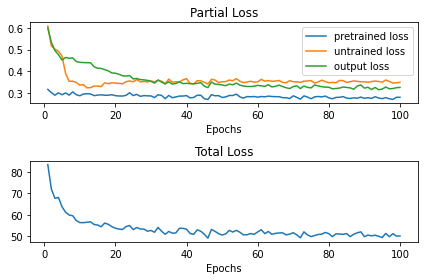

In [12]:
#partial loss graph
epochlist=list(range(1, EPOCHS+1))
#print(epochlist)
fig, (partial_loss, total_loss) = plt.subplots(2)


partial_loss.plot(epochlist,pretrainedlosslist, label="pretrained loss")
partial_loss.plot(epochlist,untrainedlosslist, label="untrained loss")
partial_loss.plot(epochlist,outputlosslist, label="output loss")



partial_loss.set_xlabel('Epochs')
partial_loss.set_label('Loss')
partial_loss.set_title('Partial Loss')


partial_loss.legend()


plt.plot(epochlist,totallosslist,label="total loss")


total_loss.set_xlabel('Epochs')
total_loss.set_label('Loss')
total_loss.set_title('Total Loss')
fig.tight_layout()




